## Example Code to Analyze Twitter Data using 
## afinn package to do sentiment analysis
## and nltk for text mining

Information about the afinn dataset: https://finnaarupnielsen.wordpress.com/2011/03/16/afinn-a-new-word-list-for-sentiment-analysis/

Information about the afinn package:http://rkuykendall.com/articles/simple-sentiment-analysis-in-python-using-afinn/

In the first step we import needed packages, read a json file, and then CAREFULLY choose which lines to analyze. The try structure allows the code to continue even if there is an error. The if statements skip lines in the file that don't have the information we need.

In [1]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from afinn import Afinn

tweets_data_path = 'baseball.json' #set this to your filename
tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        if 'created_at' in line:
             tweet = json.loads(line)
             #if 'retweeted_status' in tweet:
             tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

138


We will use the Pandas DataFrame to hold the information. In this case, we construct the dataframe manually from the information in the list called tweets_data. The afinn line shows how easy it is to get a score for a piece of text.

In [2]:
tweets = pd.DataFrame()
#ADD columns to dataframe
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] is not None else None, tweets_data))

#embedded if statement address if the retweeted_status piece is not present
tweets['favorite_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['favorite_count']) if 'retweeted_status' in tweet else int(tweet['favorite_count']), tweets_data))
tweets['retweet_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['retweet_count']) if 'retweeted_status' in tweet else int(tweet['retweet_count']), tweets_data))
	
afinn = Afinn(emoticons=True)
tweets['sentiment'] = list(map(lambda tweet: afinn.score(tweet['text']), tweets_data ))

tweets['created'] = list(map(lambda tweet: tweet['created_at'], tweets_data))

In [3]:
len(tweets['text'])

138

In [4]:
len(tweets[tweets.retweet_count > 500])

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ABA899148>]],
      dtype=object)

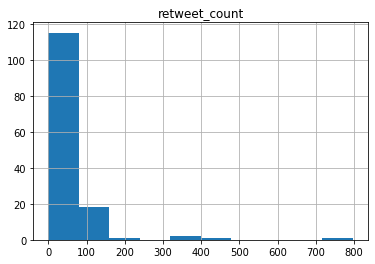

In [5]:
#We can use the hist function for a DataFrame to draw a chart!
tweets.hist(column='retweet_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ABDD5D8C8>]],
      dtype=object)

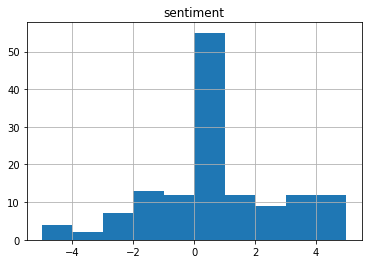

In [6]:
tweets.hist(column='sentiment')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ABDDE14C8>]],
      dtype=object)

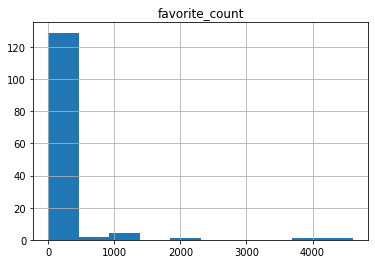

In [7]:
tweets.hist(column='favorite_count')

In [8]:
#we can use the nlargest or nsmallest to see results
print(tweets.nlargest(5,'retweet_count'))

                                                  text lang country  \
133  RT @ishkarnBHANDARI: Today @AmitShah ji is bat...   en    None   
39   RT @BtsMvStatistics: [BTS  STATISTICS WEEK 64]...   en    None   
24   RT @blaqbfly: on god tho riddle me this. how’s...   en    None   
129  RT @The_Sleigher: Rishabh Pant has wicketkeepi...   en    None   
128  RT @AnthonyDiComo: Carlos Beltrán's 2020 Mets ...   en    None   

     favorite_count  retweet_count  sentiment                         created  
133            3859            797        4.0  Mon Dec 09 15:15:11 +0000 2019  
39              762            458        1.0  Tue Dec 03 23:54:46 +0000 2019  
24             1164            372       -5.0  Tue Dec 03 23:53:17 +0000 2019  
129            2160            364        0.0  Mon Dec 09 15:14:49 +0000 2019  
128            1133            163        0.0  Mon Dec 09 15:14:43 +0000 2019  


In [9]:
print(tweets.nsmallest(10,'sentiment'))

                                                  text lang country  \
24   RT @blaqbfly: on god tho riddle me this. how’s...   en    None   
64   RT @DaniLavelle: Officially 726 homeless peopl...   en    None   
67   RT @guywilliamsguy: Kiwis love saying “No worr...   en    None   
113  RT @TroyPSilva: Losing\nFailure\n0-fers\nNot s...   en    None   
0    RT @deathbyhibachi: Homeless Deaths\nhttps://t...   en    None   
60    You are not alone! #MentalHealthMatters #anxiety   en    None   
103  So now Republicans have brought back their rea...   en    None   
115  RT @MSignorile: So now Republicans have brough...   en    None   
121  RT @MSignorile: So now Republicans have brough...   en    None   
126  RT @MSignorile: So now Republicans have brough...   en    None   

     favorite_count  retweet_count  sentiment                         created  
24             1164            372       -5.0  Tue Dec 03 23:53:17 +0000 2019  
64                4              2       -5.0  Tue Dec 03 

In [12]:
from textblob import TextBlob
import nltk

In [13]:
tweetstr = " ".join(tweets['text'])
tweetblob = TextBlob(tweetstr)
tokens = nltk.word_tokenize(tweetstr)

In [14]:
tweetblob.sentiment

Sentiment(polarity=0.054681878407759336, subjectivity=0.44026434043212553)

In [15]:
tweetblob.words.count('victory')

0

In [16]:
wordfreqs = nltk.probability.FreqDist(w.lower() for w in tweetblob.words)
mostcommon = wordfreqs.most_common(20)
mostcommon

[('rt', 75),
 ('the', 63),
 ('to', 55),
 ('of', 51),
 ('https', 48),
 ('and', 41),
 ('statistics', 36),
 ('is', 36),
 ('on', 34),
 ('a', 30),
 ('in', 26),
 ('i', 21),
 ('are', 20),
 ('for', 19),
 ('have', 19),
 ('you', 17),
 ('their', 17),
 ('republicans', 16),
 ('’', 15),
 ('with', 15)]

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
wordfreqs = nltk.probability.FreqDist(w.lower() for w in tweetblob.words if w not in stopwords)
mostcommon = wordfreqs.most_common(20)
mostcommon

[('rt', 75),
 ('https', 48),
 ('statistics', 36),
 ('i', 16),
 ('republicans', 16),
 ('’', 15),
 ('batting', 15),
 ('pitching', 15),
 ('new', 12),
 ('national', 11),
 ('based', 10),
 ('government', 9),
 ('one', 9),
 ('th…', 9),
 ('really', 9),
 ("'s", 9),
 ('so', 9),
 ('congress', 9),
 ('bring', 9),
 ('jamesmelville', 8)]

In [19]:
ngrams = nltk.bigrams(tweetblob.words)
ngramfreqs = nltk.probability.FreqDist(ngrams)
mostcommon = ngramfreqs.most_common(20)
mostcommon

[(('of', 'the'), 10),
 (('there', 'is'), 9),
 (('is', 'one'), 9),
 (('Congress', 'and'), 9),
 (('are', 'pitching'), 9),
 (('’', 's'), 8),
 (('RT', 'JamesMelville'), 8),
 (('JamesMelville', 'Based'), 8),
 (('Based', 'on'), 8),
 (('on', 'these'), 8),
 (('these', 'Tory'), 8),
 (('Tory', 'government'), 8),
 (('government', 'national'), 8),
 (('national', 'debt'), 8),
 (('debt', 'statistics'), 8),
 (('statistics', 'during'), 8),
 (('during', 'a'), 8),
 (('a', 'decade'), 8),
 (('decade', 'of'), 8),
 (('of', 'austerity'), 8)]

In [21]:
text = nltk.Text(w.SSlower() for w in tweetblob.words if w not in stopwords)
text.similar('OSChasers')
text2 = nltk.Text(w.lower() for w in tokens if w not in stopwords)
text2.similar('player statistics')

No matches
No matches


In [22]:
lotsofblobs = list(TextBlob(tweet['text']))
len(lotsofblobs)

127

In [23]:
tweets['blob'] = list(map(lambda tweet: TextBlob(tweet['text']), tweets_data ))
len(tweets['blob'])
tweets['blob'][1].sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [24]:
tweets['blobsentiment'] = map(lambda tweet: tweet.sentiment, tweets_data )
len(tweets['blobsentiment'])

138